In [11]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import os

# def compute_and_plot_frequency(df_path,model_name = "None"):
#     # Load the prediction data
#     preds_df = pd.read_csv(df_path, header=None)

#     # Convert predictions to binary (0 or 1) based on a threshold of 0.5
#     binary_preds_df = (preds_df >= 0.5).astype(int)

#     # Count the number of 1's in each row
#     label_counts = binary_preds_df.sum(axis=1)

#     # Compute the frequency of each count
#     frequency_counts = label_counts.value_counts().sort_index()

#     # Create a DataFrame to display the frequency of multi-label predictions
#     frequency_df = pd.DataFrame({'Number of 1s': frequency_counts.index, 'Frequency': frequency_counts.values})

#     # Plot the bar graph
#     plt.figure(figsize=(10, 6))
#     plt.bar(frequency_df['Number of 1s'], frequency_df['Frequency'], color='skyblue')
#     plt.xlabel('Number of 1s')
#     plt.ylabel('Frequency')
#     plt.title(f'Frequency of Multi-Label Predictions of {model_name}')
#     plt.xticks(frequency_df['Number of 1s'])
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

#     return frequency_df

# # Example usage:
# df_path = '/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/'
# paths = ["CNN","LSTM","loss_wan0.0_roberta", "loss_wan0.1_roberta","loss_wan0.2_roberta","loss_wan0.3_roberta","loss_wan0.4_roberta","loss_wan0.5_roberta","loss_wan0.7_roberta","loss_wan0.9_roberta"
#          ,"loss_wan1.0_roberta"]

# for model_path in paths: 
#     output_dir = os.path.join(df_path,model_path, "probs_val.csv")
#     frequency_df = compute_and_plot_frequency(output_dir,model_path)
#     frequency_df


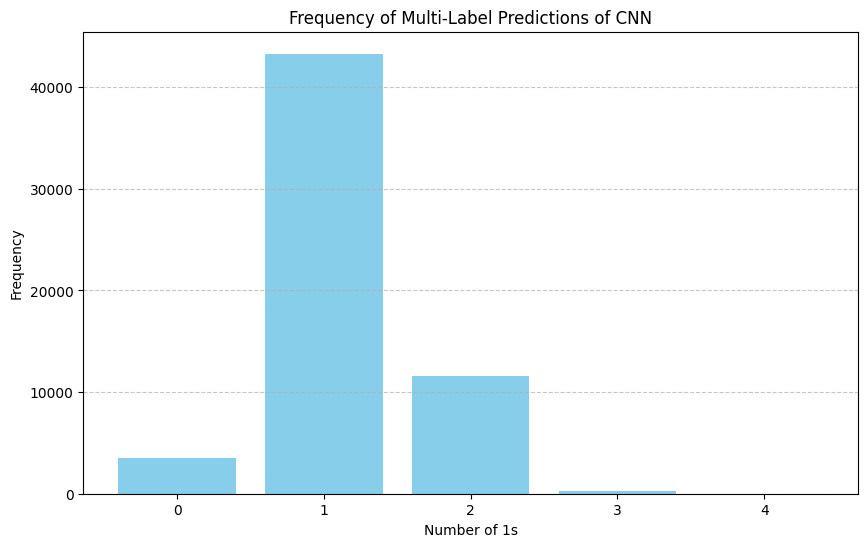

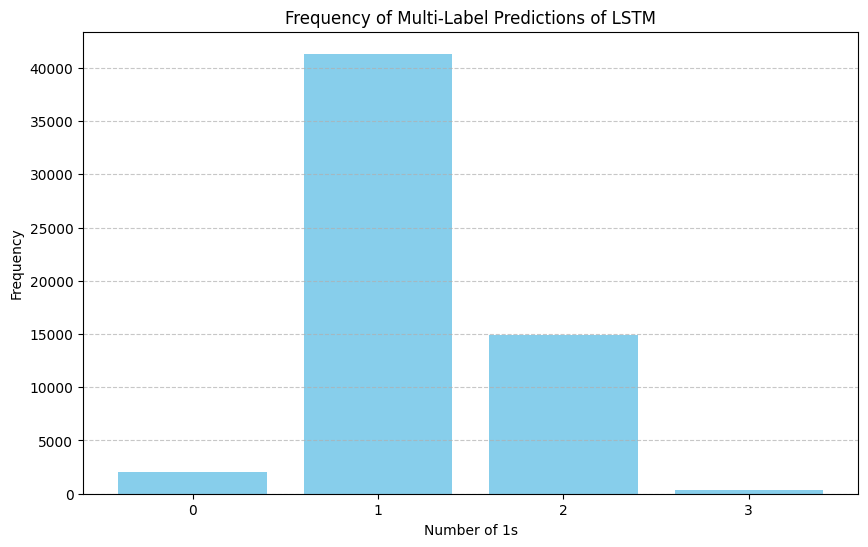

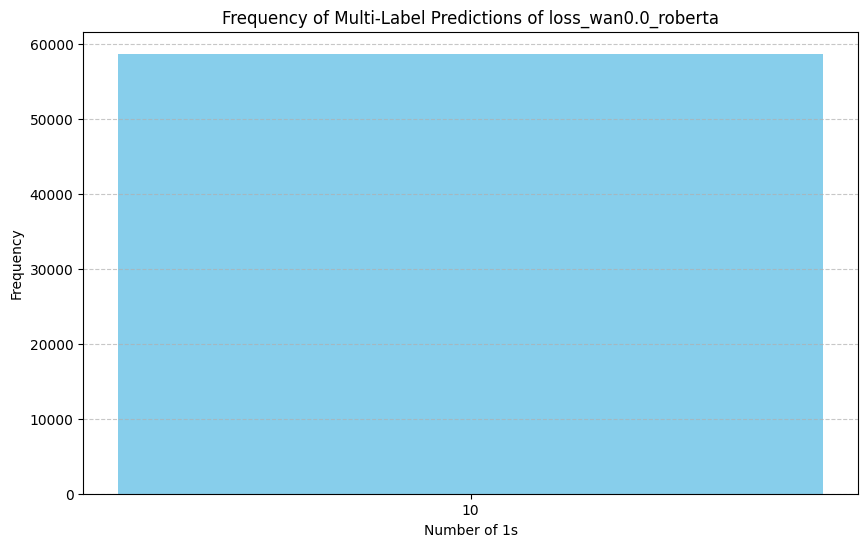

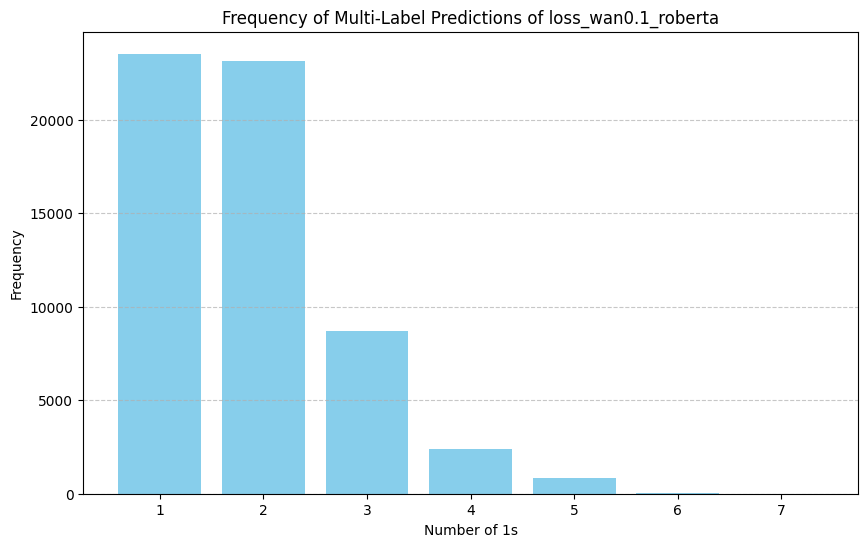

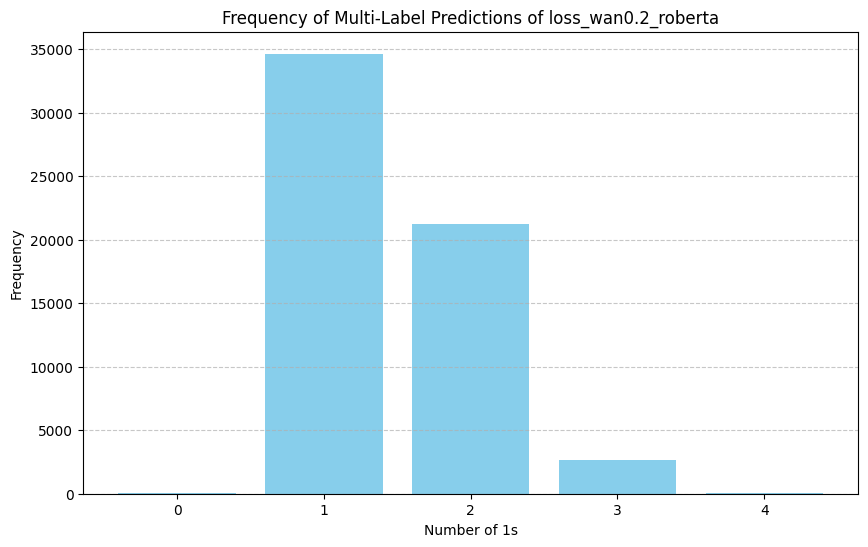

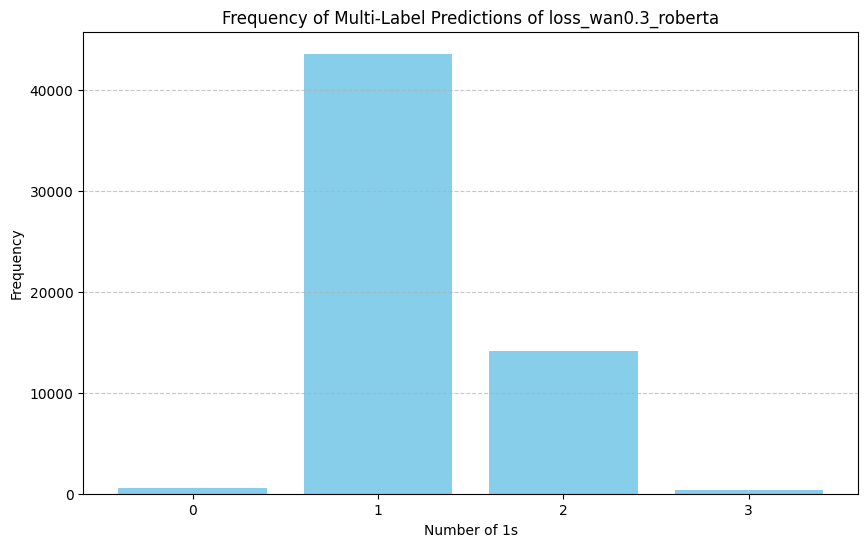

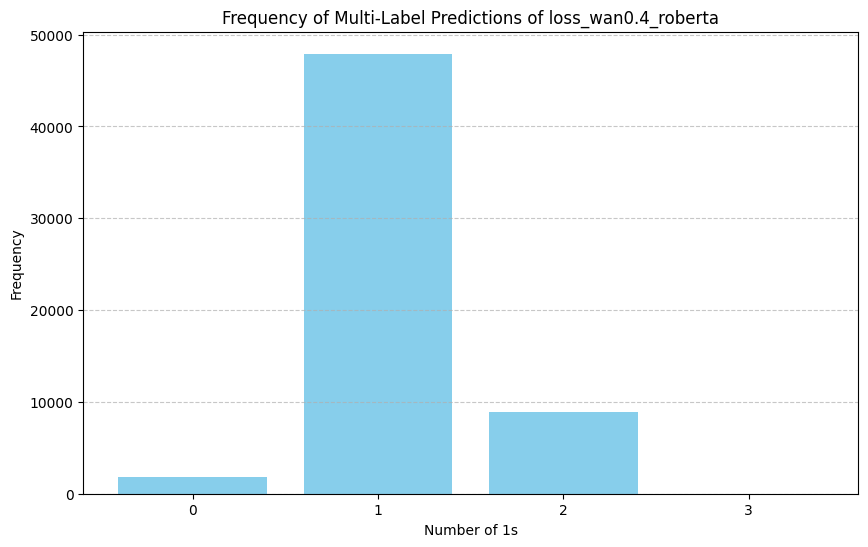

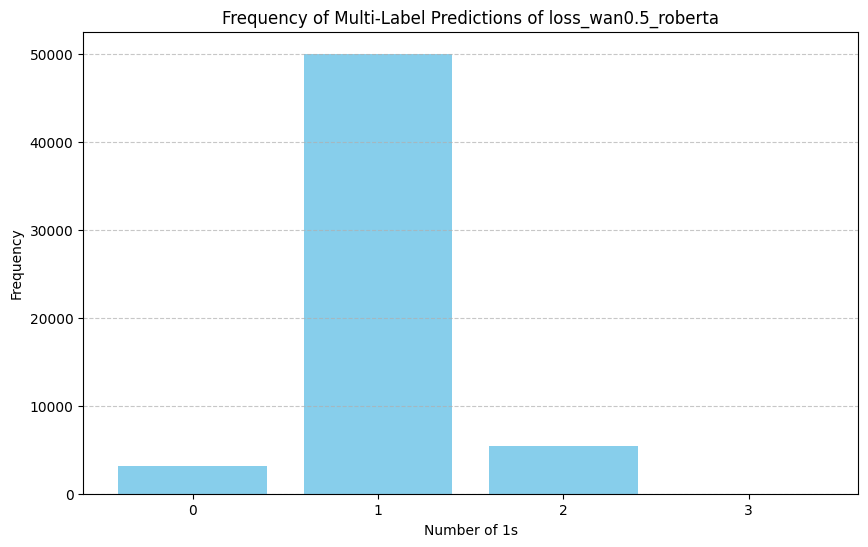

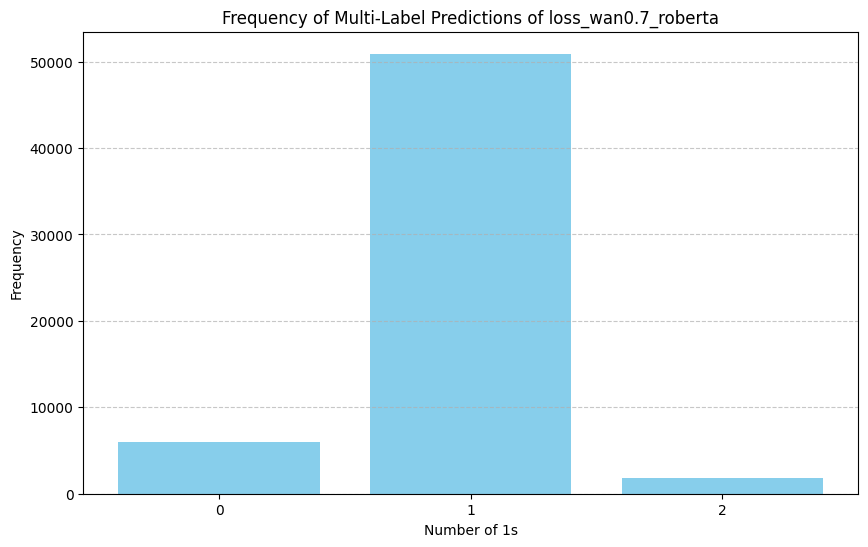

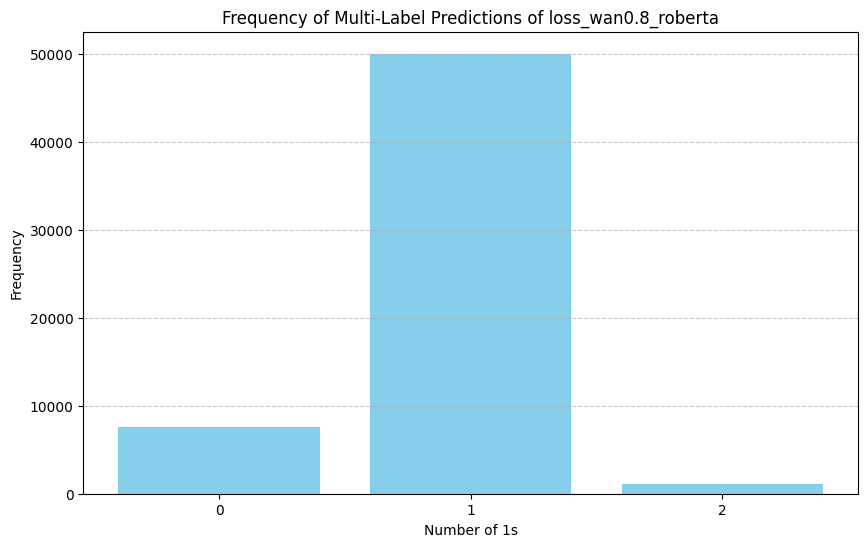

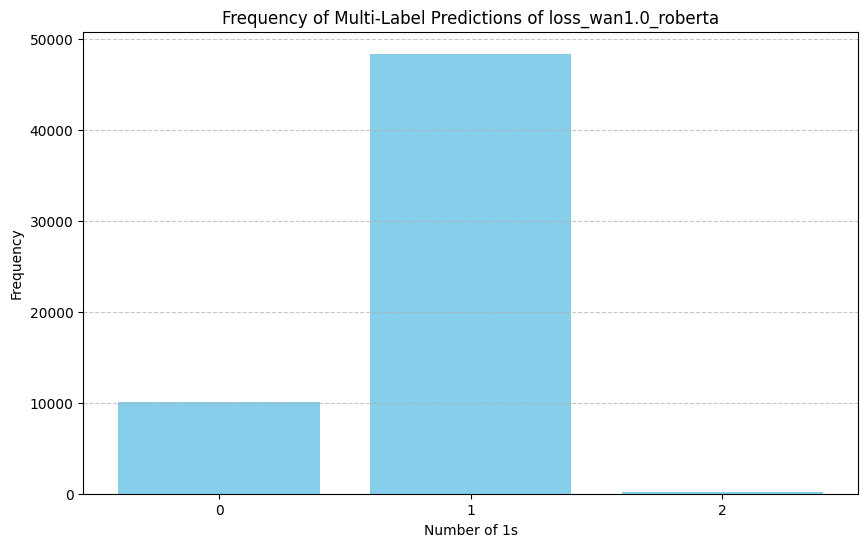

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def compute_and_plot_frequency(df_path,model_name = "None"):
    # Load the prediction data
    preds_df = pd.read_csv(df_path, header=None)

    # Convert predictions to binary (0 or 1) based on a threshold of 0.5
    binary_preds_df = (preds_df >= 0.5).astype(int)

    # Count the number of 1's in each row
    label_counts = binary_preds_df.sum(axis=1)

    # Compute the frequency of each count
    frequency_counts = label_counts.value_counts().sort_index()

    # Create a DataFrame to display the frequency of multi-label predictions
    frequency_df = pd.DataFrame({'Number of 1s': frequency_counts.index, 'Frequency': frequency_counts.values})

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_df['Number of 1s'], frequency_df['Frequency'], color='skyblue')
    plt.xlabel('Number of 1s')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Multi-Label Predictions of {model_name}')
    plt.xticks(frequency_df['Number of 1s'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return frequency_df

# Example usage:
df_path = '/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/'
paths = ["CNN","LSTM","loss_wan0.0_roberta", "loss_wan0.1_roberta","loss_wan0.2_roberta","loss_wan0.3_roberta","loss_wan0.4_roberta","loss_wan0.5_roberta","loss_wan0.7_roberta","loss_wan0.8_roberta"
         ,"loss_wan1.0_roberta"]

for model_path in paths: 
    output_dir = os.path.join(df_path,model_path, "probs.csv")
    frequency_df = compute_and_plot_frequency(output_dir,model_path)
    frequency_df


In [13]:
import pandas as pd
import os

def compute_frequency(df_path):
    # Load the prediction data
    preds_df = pd.read_csv(df_path, header=None)

    # Convert predictions to binary (0 or 1) based on a threshold of 0.5
    binary_preds_df = (preds_df >= 0.5).astype(int)

    # Count the number of 1's in each row
    label_counts = binary_preds_df.sum(axis=1)

    # Compute the frequency of each count
    frequency_counts = label_counts.value_counts().sort_index()

    return frequency_counts

df_path = '/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/'
paths = [ "loss_wan0.0_roberta", "loss_wan0.1_roberta",
         "loss_wan0.2_roberta", "loss_wan0.3_roberta", "loss_wan0.4_roberta", "loss_wan0.5_roberta",
         "loss_wan0.7_roberta", "loss_wan0.8_roberta", "loss_wan1.0_roberta"]

# Initialize an empty list to store frequency data for each model
all_frequencies = []

for model_path in paths:
    # output_dir = os.path.join(df_path, model_path, "probs.csv")
    output_dir = os.path.join(df_path, model_path, "probs_val.csv")

    frequency_counts = compute_frequency(output_dir)
    
    # Convert to dictionary and add model name
    freq_dict = frequency_counts.to_dict()
    freq_dict['model'] = model_path
    
    all_frequencies.append(freq_dict)

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(all_frequencies)

# Set 'model' as the index
result_df.set_index('model', inplace=True)

# Fill NaN values with 0 and convert to integers
result_df = result_df.fillna(0).astype(int)

# Ensure all columns from 0 to 10 are present, fill with 0 if missing
for i in range(11):
    if i not in result_df.columns:
        result_df[i] = 0

# Sort columns
result_df = result_df.sort_index(axis=1)

# Display the result
print(result_df)

                       0      1      2     3     4    5   6   7   8   9   \
model                                                                      
loss_wan0.0_roberta     0      0      0     0     0    0   0   0   0   0   
loss_wan0.1_roberta     0  11105  10631  4084  1125  385  37   3   0   0   
loss_wan0.2_roberta    16  16279   9842  1196    36    1   0   0   0   0   
loss_wan0.3_roberta   314  20380   6467   209     0    0   0   0   0   0   
loss_wan0.4_roberta   887  22326   4149     8     0    0   0   0   0   0   
loss_wan0.5_roberta  1468  23375   2527     0     0    0   0   0   0   0   
loss_wan0.7_roberta  2811  23772    787     0     0    0   0   0   0   0   
loss_wan0.8_roberta  3577  23312    481     0     0    0   0   0   0   0   
loss_wan1.0_roberta  4693  22536    141     0     0    0   0   0   0   0   

                        10  
model                       
loss_wan0.0_roberta  27370  
loss_wan0.1_roberta      0  
loss_wan0.2_roberta      0  
loss_wan0.3_robert

In [14]:
result_df

,0,1,2,3,4,5,6,7,8,9,10
model,,,,,,,,,,,
loss_wan0.0_roberta,0,0,0,0,0,0,0,0,0,0,27370
loss_wan0.1_roberta,0,11105,10631,4084,1125,385,37,3,0,0,0
loss_wan0.2_roberta,16,16279,9842,1196,36,1,0,0,0,0,0
loss_wan0.3_roberta,314,20380,6467,209,0,0,0,0,0,0,0
loss_wan0.4_roberta,887,22326,4149,8,0,0,0,0,0,0,0
loss_wan0.5_roberta,1468,23375,2527,0,0,0,0,0,0,0,0
loss_wan0.7_roberta,2811,23772,787,0,0,0,0,0,0,0,0
loss_wan0.8_roberta,3577,23312,481,0,0,0,0,0,0,0,0
loss_wan1.0_roberta,4693,22536,141,0,0,0,0,0,0,0,0


In [15]:
import numpy as np
from sklearn.metrics import roc_auc_score

def compute_tp_fp_fn_tn(targs, preds):
    tp = np.sum((targs == 1) & (preds >= 0.5), axis=0)
    fp = np.sum((targs == 0) & (preds >= 0.5), axis=0)
    fn = np.sum((targs == 1) & (preds < 0.5), axis=0)
    tn = np.sum((targs == 0) & (preds < 0.5), axis=0)
    return tp, fp, fn, tn

def accuracy(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    return np.sum(tp + tn) / np.sum(tp + fp + fn + tn)

def precision_micro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    return np.sum(tp) / (np.sum(tp) + np.sum(fp))

def precision_macro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    precisions = tp / (tp + fp)
    return np.mean(precisions)

# def precision_weighted(targs, preds):
#     tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
#     precisions = tp / (tp + fp)
#     weights = np.sum(targs, axis=0) / np.sum(targs)
#     return np.sum(precisions * weights)
import numpy as np

def class_based_tp_fp(targets, predictions):
    top_pred = np.argmax(predictions, axis=1)  # Get the index of the top predicted label
    num_classes = targets.shape[1]  # Get the number of classes
    
    tp = np.zeros(num_classes)  # Array to store true positives for each class
    fp = np.zeros(num_classes)  # Array to store false positives for each class
    
    # Loop over each class to calculate class-based TP and FP
    for class_idx in range(num_classes):
        # True Positives (TP): predicted class is the correct one (class_idx) and it's actually true (1 in targets)
        tp[class_idx] = np.sum((top_pred == class_idx) & (targets[:, class_idx] == 1))
        
        # False Positives (FP): predicted class is the current class_idx, but it's actually false (0 in targets)
        fp[class_idx] = np.sum((top_pred == class_idx) & (targets[:, class_idx] == 0))
    
    return tp, fp

def precision_weighted(targets, predictions):
    top_pred = np.argmax(predictions, axis=1)  # Get the index of the top predicted sector
    tp = np.sum(targets[np.arange(targets.shape[0]), top_pred] == 1)  # True positives
    fp = np.sum(targets[np.arange(targets.shape[0]), top_pred] == 0)  # False positives

    tp, fp = class_based_tp_fp(targets, predictions)

    # Compute weights based on the frequency of each class in the target labels
    class_counts = np.sum(targets, axis=0)  # Number of times each class is present
    weights = class_counts / np.sum(class_counts)  # Normalize class counts to get weights
    

    print("tp", tp,fp,weights)
    precision = tp / (tp + fp + 1e-10)  # Compute precision
    weighted_precision = np.sum(precision*weights)



    return weighted_precision

# def precision_weighted(targets, predictions):
#     top_pred = np.argmax(predictions, axis=1)  # Get the index of the top predicted sector
#     tp = np.sum(targets[np.arange(targets.shape[0]), top_pred] == 1)  # True positives
#     fp = np.sum(targets[np.arange(targets.shape[0]), top_pred] == 0)  # False positives

#     # Compute weights based on the frequency of each class in the target labels
#     class_counts = np.sum(targets, axis=0)  # Number of times each class is present
#     weights = class_counts / np.sum(class_counts)  # Normalize class counts to get weights
    

#     print("tp", tp,fp,weights)
#     precision = tp / (tp + fp + 1e-10)  # Compute precision
#     weighted_precision = np.sum(precision*weights)



#     return weighted_precision





def recall_micro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    return np.sum(tp) / (np.sum(tp) + np.sum(fn))

def recall_macro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    recalls = tp / (tp + fn)
    return np.mean(recalls)

def recall_weighted(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    recalls = tp / (tp + fn)
    weights = np.sum(targs, axis=0) / np.sum(targs)
    return np.sum(recalls * weights)

def top_n_recall(targs, preds, n):
    sorted_indices = np.argsort(preds, axis=1)[:, ::-1]
    top_n_preds = np.zeros_like(preds)
    for i, indices in enumerate(sorted_indices[:, :n]):
        mask = preds[i, indices] > 0.5
        top_n_preds[i, indices[mask]] = 1
    tp = np.sum(targs * top_n_preds, axis=1)
    return np.mean(tp)
 
def auc(targs, preds):
    return roc_auc_score(targs, preds, average='macro')

def prediction_entropy(preds):
    return -np.sum(preds * np.log(preds + 1e-10), axis=1).mean()



    print(f"Accuracy: {accuracy(targs, preds):.4f}")
    print(f"Precision (Micro): {precision_micro(targs, preds):.4f}")
    print(f"Precision (Macro): {precision_macro(targs, preds):.4f}")
    print(f"Precision (Weighted): {precision_weighted(targs, preds):.4f}")
    print(f"Recall (Micro): {recall_micro(targs, preds):.4f}")
    print(f"Recall (Macro): {recall_macro(targs, preds):.4f}")
    print(f"Recall (Weighted): {recall_weighted(targs, preds):.4f}")
    print(f"Top-2 Recall: {top_n_recall(targs, preds, 2):.4f}")
    print(f"AUC: {auc(targs, preds):.4f}")
    print(f"Prediction Entropy: {prediction_entropy(preds):.4f}")


def compute_all_metrics(targs, preds):
    return {
        "Accuracy": accuracy(targs, preds),
        "Precision (Micro)": precision_micro(targs, preds),
        "Precision (Macro)": precision_macro(targs, preds),
        "Precision (Weighted)": precision_weighted(targs, preds),
        "Recall (Micro)": recall_micro(targs, preds),
        "Recall (Macro)": recall_macro(targs, preds),
        "Recall (Weighted)": recall_weighted(targs, preds),
        "Top-2 Recall": top_n_recall(targs, preds, 2),
        "Top-3 Recall": top_n_recall(targs, preds, 3),
        "Top-4 Recall": top_n_recall(targs, preds, 4),
        "AUC": auc(targs, preds),
        "Prediction Entropy": prediction_entropy(preds)
    }

In [16]:
directory = "/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.3_roberta/"
def read_csv_files(directory):
    probs_path = os.path.join(directory, "probs.csv")
    y_true_path = os.path.join(directory, "y_true.csv")

    print("probs_path",probs_path)
    
    if not (os.path.exists(probs_path) and os.path.exists(y_true_path)):
        return None, None
    
    preds = pd.read_csv(probs_path, header=None).values
    targs = pd.read_csv(y_true_path, header=None).values
    
    return targs, preds


dff = read_csv_files(directory)

probs_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.3_roberta/probs.csv


In [17]:
dff

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0.00957294, 0.0470496 , 0.06028428, ..., 0.04158182, 0.02350547,
         0.01970318],
        [0.02655166, 0.55768067, 0.03853086, ..., 0.01764086, 0.14980003,
         0.84363508],
        [0.95056295, 0.13439421, 0.0344502 , ..., 0.08441264, 0.01275599,
         0.02737822],
        ...,
        [0.03759193, 0.37117571, 0.22321719, ..., 0.6472798 , 0.51909804,
         0.02299645],
        [0.02389859, 0.96057552, 0.01592195, ..., 0.01085673, 0.06644608,
         0.03549   ],
        [0.02441501, 0.04221636, 0.19482251, ..., 0.01536796, 0.94621855,
         0.03021579]]))

In [18]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming all metric functions (accuracy, precision_micro, etc.) are defined as before

def compute_all_metrics(targs, preds):
    return {
        "Accuracy": accuracy(targs, preds),
        # "Precision (Micro)": precision_micro(targs, preds),
        # "Precision (Macro)": precision_macro(targs, preds),
        "Precision (Weighted)": precision_weighted(targs, preds),
        # "Recall (Micro)": recall_micro(targs, preds),
        # "Recall (Macro)": recall_macro(targs, preds),
        "Recall (Weighted)": recall_weighted(targs, preds),
        "Top-1 Recall": top_n_recall(targs, preds, 1),
        "Top-2 Recall": top_n_recall(targs, preds, 2),
        "Top-3 Recall": top_n_recall(targs, preds, 3),
        # "Top-4 Recall": top_n_recall(targs, preds, 4),
        "AUC": auc(targs, preds),
        "Prediction Entropy": prediction_entropy(preds)
    }

def read_csv_files(directory):
    probs_path = os.path.join(directory, "probs.csv")
    y_true_path = os.path.join(directory, "y_true.csv")

    print("probs_path",probs_path)
    
    if not (os.path.exists(probs_path) and os.path.exists(y_true_path)):
        return None, None
    
    preds = pd.read_csv(probs_path, header=None).values
    targs = pd.read_csv(y_true_path, header=None).values
    
    return targs, preds

def read_csv_files_val(directory):
    probs_path = os.path.join(directory, "probs_val.csv")
    # y_true_path = os.path.join(directory, "y_true_val.csv")
    y_true_path = os.path.join("/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.0_roberta/", "y_true_val.csv")

    
    if not (os.path.exists(probs_path) and os.path.exists(y_true_path)):
        return None, None
    
    preds = pd.read_csv(probs_path, header=None).values
    targs = pd.read_csv(y_true_path, header=None).values
    
    return targs, preds

def process_directories(base_path, subdirs):
    data = []
    
    for subdir in subdirs:
        if subdir not in ["CNN", "LSTM","rnd_forest_whole_hp","rnd_forest_whole_wan_0.0","rnd_forest_wan_sum0.3"]:
            full_path = os.path.join(base_path, f"loss_wan{subdir}_roberta")
            targs, preds = read_csv_files(full_path)
            # print(targs.shape, preds.shape)
            if targs is not None and preds is not None:
                metrics = compute_all_metrics(targs, preds)
                metrics['subdir'] = f"loss_wan{subdir}_roberta"
                data.append(metrics)
        else:
            print("subdir", subdir)
            full_path = os.path.join(base_path, f"{subdir}")
            targs, preds = read_csv_files(full_path)
            print("full_path",full_path,targs,preds )
            # print(targs.shape, preds.shape)
            if targs is not None and preds is not None:
                metrics = compute_all_metrics(targs, preds)
                metrics['subdir'] = f"{subdir}"
                data.append(metrics)
        
    return data


def process_directories_val(base_path, subdirs):
    data = []
    
    for subdir in subdirs:
        if subdir not in ["CNN", "LSTM","rnd_forest_whole_hp","rnd_forest_whole_wan_0.0","rnd_forest_wan_sum0.3","whole_rnd_forest_wan_sum_new0.1","whole_rnd_forest_wan_sum_new0.3","summary_rnd_forest_wan_sum_new0.1","summary_rnd_forest_wan_sum_new0.3"]:
            full_path = os.path.join(base_path, f"loss_wan{subdir}_roberta")
            print("full_path",full_path)
            targs, preds = read_csv_files_val(full_path)
            print(targs.shape, preds.shape)
            if targs is not None and preds is not None:
                metrics = compute_all_metrics(targs, preds)
                metrics['subdir'] = f"loss_wan{subdir}_roberta"
                data.append(metrics)
        else:

            full_path = os.path.join(base_path, f"{subdir}")
            targs, preds = read_csv_files_val(full_path)
            # print(targs.shape, preds.shape)
            if targs is not None and preds is not None:
                metrics = compute_all_metrics(targs, preds)
                metrics['subdir'] = f"{subdir}"
                data.append(metrics)
        
    return data

def create_dataframe(data):
    df = pd.DataFrame(data)
    df.set_index('subdir', inplace=True)
    
    # Round all numeric columns to 3 decimal points
    numeric_columns = df.select_dtypes(include=['float64']).columns
    df[numeric_columns] = df[numeric_columns].round(3)
    
    return df

# Main execution
base_path = "/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results"
subdirs = ["0.0","0.1", "0.2", "0.3", "0.4", "0.5", "0.7","0.8","1.0", "CNN", "LSTM","rnd_forest_whole_hp","rnd_forest_whole_wan_0.0","rnd_forest_wan_sum0.3","whole_rnd_forest_wan_sum_new0.1","whole_rnd_forest_wan_sum_new0.3","summary_rnd_forest_wan_sum_new0.1","summary_rnd_forest_wan_sum_new0.3"]  # Add more subdirectories as needed
subdirs = ["0.0","0.1", "0.3","1.0", "LSTM","rnd_forest_whole_hp","rnd_forest_whole_wan_0.0","rnd_forest_wan_sum0.3","whole_rnd_forest_wan_sum_new0.1","whole_rnd_forest_wan_sum_new0.3","summary_rnd_forest_wan_sum_new0.1","summary_rnd_forest_wan_sum_new0.3"]  # Add more subdirectories as needed

# subdirs = ["0.0", "0.3","1.0"]  # Add more subdirectories as needed

data = process_directories(base_path, subdirs)
df = create_dataframe(data)

df
df.to_csv("evaluation_results.csv")

df

probs_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.0_roberta/probs.csv


tp [    0.     0.     0. 11499.     0.     0.     0.     0.     0.     0.] [    0.     0.     0. 47150.     0.     0.     0.     0.     0.     0.] [0.1302324  0.13826323 0.06775904 0.19606472 0.05689782 0.15135808
 0.08896997 0.03699978 0.08087094 0.05258402]
probs_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.1_roberta/probs.csv
tp [5786. 4682. 2254. 8469. 2192. 6274. 4192. 1049. 2781. 2217.] [2771. 2798. 1443. 3001.  683. 2768. 1415. 1017. 1790. 1067.] [0.1302324  0.13826323 0.06775904 0.19606472 0.05689782 0.15135808
 0.08896997 0.03699978 0.08087094 0.05258402]
probs_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.3_roberta/probs.csv
tp [5765. 4693. 2257. 8494. 2162. 6333. 4189.  999. 2834. 2194.] [2826. 2794. 1500. 2979.  676. 2870. 1360.  917. 1806. 1001.] [0.1302324  0.13826323 0.06775904 0.19606472 0.05689782 0.15135808
 0.08896997 0.03699978 0.08087094 0.05258402]
probs_path /data/sxs7285/Porjects_co

,Accuracy,Precision (Weighted),Recall (Weighted),Top-1 Recall,Top-2 Recall,Top-3 Recall,AUC,Prediction Entropy
subdir,,,,,,,,
loss_wan0.0_roberta,0.100,0.038,1.000,0.196,0.349,0.486,0.554,0.000
loss_wan0.1_roberta,0.885,0.679,0.862,0.680,0.823,0.854,0.935,1.972
loss_wan0.3_roberta,0.928,0.679,0.760,0.679,0.758,0.760,0.934,1.454
loss_wan1.0_roberta,0.939,0.672,0.613,0.611,0.613,0.613,0.927,1.055
LSTM,0.914,0.612,0.685,0.605,0.684,0.685,0.907,1.732


In [19]:
df[['Precision (Weighted)',
 'Recall (Weighted)',
 'Top-1 Recall',
 'Top-3 Recall']]

,Precision (Weighted),Recall (Weighted),Top-1 Recall,Top-3 Recall
subdir,,,,
loss_wan0.0_roberta,0.038,1.000,0.196,0.486
loss_wan0.1_roberta,0.679,0.862,0.680,0.854
loss_wan0.3_roberta,0.679,0.760,0.679,0.760
loss_wan1.0_roberta,0.672,0.613,0.611,0.613
LSTM,0.612,0.685,0.605,0.685


In [20]:
x

NameError: name 'x' is not defined

In [11]:
# Main execution
base_path = "/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results"
subdirs = ["0.0","0.1", "0.2", "0.3", "0.4", "0.5", "0.7","0.8","1.0"]  # Add more subdirectories as needed

data = process_directories_val(base_path, subdirs)
df = create_dataframe(data)

full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.0_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.1_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.2_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.3_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.4_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.5_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.7_roberta
(27370, 10) (27370, 10)
full_path /data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.8_roberta
(27370, 10) (27370, 10)


In [18]:
df[['Precision (Weighted)',
 'Recall (Weighted)',
 'Top-1 Recall',
 'Top-3 Recall']]

,Precision (Weighted),Recall (Weighted),Top-1 Recall,Top-3 Recall
subdir,,,,
loss_wan0.0_roberta,0.196,1.000,0.196,0.486
loss_wan0.1_roberta,0.674,0.859,0.674,0.849
loss_wan0.2_roberta,0.673,0.794,0.673,0.794
loss_wan0.3_roberta,0.676,0.754,0.674,0.754
loss_wan0.4_roberta,0.673,0.718,0.666,0.718
loss_wan0.5_roberta,0.670,0.688,0.656,0.688
loss_wan0.7_roberta,0.671,0.650,0.640,0.650
loss_wan0.8_roberta,0.668,0.634,0.626,0.634
loss_wan1.0_roberta,0.668,0.610,0.608,0.610


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# Define metric functions
def compute_tp_fp_fn_tn(targs, preds):
    tp = np.sum((targs == 1) & (preds >= 0.5), axis=0)
    fp = np.sum((targs == 0) & (preds >= 0.5), axis=0)
    fn = np.sum((targs == 1) & (preds < 0.5), axis=0)
    tn = np.sum((targs == 0) & (preds < 0.5), axis=0)
    return tp, fp, fn, tn

def accuracy(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    return np.sum(tp + tn) / np.sum(tp + fp + fn + tn)

def precision_micro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    return np.sum(tp) / (np.sum(tp) + np.sum(fp))

def precision_macro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    precisions = tp / (tp + fp)
    return np.mean(precisions)

def precision_weighted(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    precisions = tp / (tp + fp)
    weights = np.sum(targs, axis=0) / np.sum(targs)
    return np.sum(precisions * weights)

def recall_micro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    return np.sum(tp) / (np.sum(tp) + np.sum(fn))

def recall_macro(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    recalls = tp / (tp + fn)
    return np.mean(recalls)

def recall_weighted(targs, preds):
    tp, fp, fn, tn = compute_tp_fp_fn_tn(targs, preds)
    recalls = tp / (tp + fn)
    weights = np.sum(targs, axis=0) / np.sum(targs)
    return np.sum(recalls * weights)

def top_n_recall(targs, preds, n):
    sorted_indices = np.argsort(preds, axis=1)[:, ::-1]
    top_n_preds = np.zeros_like(preds)
    for i, indices in enumerate(sorted_indices[:, :n]):
        top_n_preds[i, indices] = 1
    tp = np.sum(targs * top_n_preds, axis=1)
    return np.mean(tp)


def auc(targs, preds):
    return roc_auc_score(targs, preds, average='macro')

def prediction_entropy(preds):
    return -np.sum(preds * np.log(preds + 1e-10), axis=1).mean()

# Define function to compute metrics for each class
def compute_all_metrics_per_class(targs, preds):
    metrics_per_class = {}
    classes = np.array(['civil, mechanical & electrical', 'consumer & supply chain', 'education',
                        'finance, marketing & human resources', 'government, defense & legal',
                        'information technology & electronics', 'medical', 'non-profit',
                        'sports, media & entertainment', 'travel, food & hospitality'])
    for i, class_name in enumerate(classes):
        indices = np.where(targs[:, i] == 1)[0]

        class_targs = targs[indices,: ]
        class_preds = preds[indices,:]
        metrics_per_class[class_name] = {
            "Accuracy": accuracy(class_targs, class_preds),
            "Precision (Micro)": precision_micro(class_targs, class_preds),
            "Recall (Micro)": recall_micro(class_targs, class_preds),
            "Top-1 Recall": top_n_recall(class_targs, class_preds, 1),
            "Top-2 Recall": top_n_recall(class_targs, class_preds, 2),
            "Top-3 Recall": top_n_recall(class_targs, class_preds, 3),
            "Top-4 Recall": top_n_recall(class_targs, class_preds, 4),
            # "AUC": auc(class_targs, class_preds),
            "Prediction Entropy": prediction_entropy(class_preds)
        }
    return metrics_per_class

# Define function to read CSV files
def read_csv_files(directory):
    probs_path = os.path.join(directory, "probs.csv")
    y_true_path = os.path.join(directory, "y_true.csv")
    
    if not (os.path.exists(probs_path) and os.path.exists(y_true_path)):
        return None, None
    
    preds = pd.read_csv(probs_path, header=None).values
    targs = pd.read_csv(y_true_path, header=None).values
    
    return targs, preds

# Define function to process directories
def process_directories(base_path, subdirs):
    all_data = {}
    
    for subdir in subdirs:

        if subdir not in ["CNN", "LSTM"]:

            full_path = os.path.join(base_path, f"loss_wan{subdir}_roberta")
            targs, preds = read_csv_files(full_path)
            
            if targs is not None and preds is not None:
                class_metrics = compute_all_metrics_per_class(targs, preds)
                metrics_df = pd.concat({k: pd.DataFrame(v, index=[k]) for k, v in class_metrics.items()})
                all_data[subdir] = metrics_df
        else:
            full_path = os.path.join(base_path, f"{subdir}")
            targs, preds = read_csv_files(full_path)
            
            if targs is not None and preds is not None:
                class_metrics = compute_all_metrics_per_class(targs, preds)
                metrics_df = pd.concat({k: pd.DataFrame(v, index=[k]) for k, v in class_metrics.items()})
                all_data[subdir] = metrics_df
    
    return all_data

# Main execution
base_path = "/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results"
subdirs = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.9","CNN", "LSTM"]  # Add more subdirectories as needed

all_metrics = process_directories(base_path, subdirs)

# Print final results
for subdir, df in all_metrics.items():
    print(f"Metrics for {subdir}:")
    df
    print("\n")


In [ ]:
all_metrics['0.3']

In [ ]:
all_metrics['CNN']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm
import os


# # Load the data from the provided CSV files
# output_dir = '/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/'
# preds1 = pd.read_csv(os.path.join(output_dir, 'loss_wan0.9_roberta/probs.csv'), header=None)
# y_true = pd.read_csv(os.path.join(output_dir, 'loss_wan0.9_roberta/y_true.csv'), header=None)

# # Generate the confusion matrix
# conf_matrix = confusion_matrix(y_true.values.argmax(axis=1), preds1.values.argmax(axis=1), labels=[i for i in range(10)])

# # Initialize the asymmetric co-occurrence matrix
# co_occurrence_matrix = np.zeros((10, 10), dtype=int)

# # # Fill the co-occurrence matrix
# # for i in range(y_true.shape[0]):
# #     true_label = y_true.values[i].argmax()
# #     predicted_labels = np.where(preds1.values[i] > 0.5, 1, 0)
# #     for j in range(10):
# #         if predicted_labels[j] == 1 and j != true_label:  # Exclude self-loops
# #             co_occurrence_matrix[true_label, j] += 1

# # Fill the co-occurrence matrix
# for i in range(y_true.shape[0]):
#     true_label = y_true.values[i].argmax()
#     predicted_labels = np.where(preds1.values[i] > 0.5, 1, 0)
#     for j in range(10):
#         if predicted_labels[j] == 1 and predicted_labels[true_label] == 1 and j != true_label:  # Exclude self-loops
#             co_occurrence_matrix[true_label, j] += 1

# # Define the labels
# labels = np.array(['civil, mechanical & electrical', 'consumer & supply chain',
#                    'education', 'finance, marketing & human resources',
#                    'government, defense & legal',
#                    'information technology & electronics', 'medical', 'non-profit',
#                    'sports, media & entertainment', 'travel, food & hospitality'])

# # Create a DataFrame for the confusion matrix with labels
# conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
# print("Confusion Matrix:")
# print(conf_matrix_df)

# # Create a DataFrame for the asymmetric co-occurrence matrix with labels
# co_occurrence_matrix_df = pd.DataFrame(co_occurrence_matrix, index=labels, columns=labels)
# print("Asymmetric Co-occurrence Matrix:")
# print(co_occurrence_matrix_df)

# # Calculate class-normalized weights
# class_counts = y_true.sum(axis=0).values
# class_normalized_weights = (co_occurrence_matrix / class_counts[:, None]) * 100  # Convert to percentage

# # Create a DataFrame showing "i" to "j" from most frequent to least
# co_occurrence_flat = [(labels[i], labels[j], co_occurrence_matrix[i, j], co_occurrence_matrix[i, j], class_normalized_weights[i, j]) 
#                       for i in range(10) for j in range(10) if co_occurrence_matrix[i, j] > 0 and i != j]
# co_occurrence_df = pd.DataFrame(co_occurrence_flat, columns=["True Label", "Predicted Label", "Frequency", "Raw Weight", "Class-normalized Weight (%)"])
# co_occurrence_sorted_df = co_occurrence_df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

# # Add Z-scores for both raw and class-normalized weights
# co_occurrence_sorted_df['Z-score (Raw)'] = zscore(co_occurrence_sorted_df['Raw Weight'])
# co_occurrence_sorted_df['Z-score (Normalized)'] = zscore(co_occurrence_sorted_df['Class-normalized Weight (%)'])

# # Add p-values for the Z-scores
# co_occurrence_sorted_df['p-value (Raw)'] = norm.sf(np.abs(co_occurrence_sorted_df['Z-score (Raw)'])) * 2  # Two-tailed test
# co_occurrence_sorted_df['p-value (Normalized)'] = norm.sf(np.abs(co_occurrence_sorted_df['Z-score (Normalized)'])) * 2  # Two-tailed test

# significant_edges_raw_df = co_occurrence_sorted_df[co_occurrence_sorted_df['Z-score (Raw)'] > 2]  # Using a Z-score threshold of 2 for raw weights
# significant_edges_normalized_df = co_occurrence_sorted_df[co_occurrence_sorted_df['Z-score (Normalized)'] > 2]  # Using a Z-score threshold of 2 for normalized weights

# # Display the sorted co-occurrence DataFrame
# print("Co-occurrence Matrix Sorted:")
# print(co_occurrence_sorted_df)

# # Display the significant edges DataFrame for raw weights
# print("Significant Edges (Raw):")
# print(significant_edges_raw_df)

# # Display the significant edges DataFrame for normalized weights
# print("Significant Edges (Normalized):")
# print(significant_edges_normalized_df)


import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm
import os
from textwrap import wrap

# Load the data from the provided CSV files
output_dir = '/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/'
preds1 = pd.read_csv(os.path.join(output_dir, 'loss_wan0.3_roberta/probs.csv'), header=None)
y_true = pd.read_csv(os.path.join(output_dir, 'loss_wan0.3_roberta/y_true.csv'), header=None)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true.values.argmax(axis=1), preds1.values.argmax(axis=1), labels=[i for i in range(10)])

# Initialize the asymmetric co-occurrence matrix
co_occurrence_matrix = np.zeros((10, 10), dtype=int)


# Fill the co-occurrence matrix
for i in range(y_true.shape[0]):
    true_label = y_true.values[i].argmax()
    predicted_labels = np.where(preds1.values[i] > 0.5, 1, 0)
    for j in range(10):
        if predicted_labels[j] == 1 and predicted_labels[true_label] == 1 and j != true_label:  # Exclude self-loops
            co_occurrence_matrix[true_label, j] += 1

# Define the labels
labels = np.array(['civil, mechanical & electrical', 'consumer & supply chain',
                   'education', 'finance, marketing & human resources',
                   'government, defense & legal',
                   'information technology & electronics', 'medical', 'non-profit',
                   'sports, media & entertainment', 'travel, food & hospitality'])

# Create a DataFrame for the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print("Confusion Matrix:")
print(conf_matrix_df)

# Create a DataFrame for the asymmetric co-occurrence matrix with labels
co_occurrence_matrix_df = pd.DataFrame(co_occurrence_matrix, index=labels, columns=labels)
print("Asymmetric Co-occurrence Matrix:")
print(co_occurrence_matrix_df)

# Calculate class-normalized weights
# class_counts = y_true.sum(axis=0).values
class_counts = co_occurrence_matrix.sum(axis=0)

class_normalized_weights = (co_occurrence_matrix / class_counts[:, None]) * 100  # Convert to percentage

# Create a DataFrame showing "i" to "j" from most frequent to least
co_occurrence_flat = [(labels[i], labels[j], co_occurrence_matrix[i, j], co_occurrence_matrix[i, j], class_normalized_weights[i, j]) 
                      for i in range(10) for j in range(10) if co_occurrence_matrix[i, j] > 0 and i != j]
co_occurrence_df = pd.DataFrame(co_occurrence_flat, columns=["True Label", "Predicted Label", "Frequency", "Raw Weight", "Class-normalized Weight (%)"])
co_occurrence_sorted_df = co_occurrence_df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

# Add Z-scores for both raw and class-normalized weights
co_occurrence_sorted_df['Z-score (Raw)'] = zscore(co_occurrence_sorted_df['Raw Weight'])
co_occurrence_sorted_df['Z-score (Normalized)'] = zscore(co_occurrence_sorted_df['Class-normalized Weight (%)'])

# Add p-values for the Z-scores
co_occurrence_sorted_df['p-value (Raw)'] = norm.sf(np.abs(co_occurrence_sorted_df['Z-score (Raw)'])) * 2  # Two-tailed test
co_occurrence_sorted_df['p-value (Normalized)'] = norm.sf(np.abs(co_occurrence_sorted_df['Z-score (Normalized)'])) * 2  # Two-tailed test

significant_edges_raw_df = co_occurrence_sorted_df[co_occurrence_sorted_df['Z-score (Raw)'] > 2]  # Using a Z-score threshold of 2 for raw weights
significant_edges_normalized_df = co_occurrence_sorted_df[co_occurrence_sorted_df['Z-score (Normalized)'] > 2]  # Using a Z-score threshold of 2 for normalized weights

# Display the sorted co-occurrence DataFrame
print("Co-occurrence Matrix Sorted:")
print(co_occurrence_sorted_df)

# Display the significant edges DataFrame for raw weights
print("Significant Edges (Raw):")
print(significant_edges_raw_df)

# Display the significant edges DataFrame for normalized weights
print("Significant Edges (Normalized):")
print(significant_edges_normalized_df)

def draw_edge_labels(G, pos, edge_labels, node_colors, font_size=8):
    for (n1, n2), label in edge_labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = ((x1 + x2) / 2, (y1 + y2) / 2)
        
        angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
        # Rotate label if it's upside-down
        if angle > 90 or angle < -90:
            angle += 180
            ha = 'right'
            va = 'bottom'
        else:
            ha = 'left'
            va = 'top'
        
        # Get the color of the source node
        node_color = node_colors[list(G.nodes()).index(n1)]
        
        plt.text(x, y, label, size=font_size, ha=ha, va=va, rotation=angle,
                 bbox=dict(boxstyle='round,pad=0.5', fc=node_color, ec='none', alpha=0.7),
                 color='white', fontweight='bold')

def create_graph(threshold=0, normalized=False, filter_zscore=False):
    G = nx.DiGraph()
    
    # Calculate weights based on normalization flag
    if normalized:
        weights = class_normalized_weights
        zscore_column = 'Z-score (Normalized)'
    else:
        weights = co_occurrence_matrix
        zscore_column = 'Z-score (Raw)'
    plt.figure(figsize=(20, 16))

    # Add edges to the graph with labels and apply threshold
    for i in range(10):
        for j in range(10):
            if i != j:  # Exclude self-loops
                weight = weights[i, j]
                if filter_zscore:
                    plt.figure(figsize=(10, 8))

                    z_scores = co_occurrence_sorted_df[(co_occurrence_sorted_df['True Label'] == labels[i]) & 
                                                       (co_occurrence_sorted_df['Predicted Label'] == labels[j])][zscore_column].values
                    if z_scores.size > 0 and z_scores[0] > 2:
                        if weight > threshold:
                            G.add_edge(labels[i], labels[j], weight=weight)
                else:
                    if weight > threshold:
                        G.add_edge(labels[i], labels[j], weight=weight)

    # Draw the graph    
    pos = nx.circular_layout(G)
    edges = G.edges(data=True)
    nodes = list(G.nodes())
    color_map = plt.cm.get_cmap('tab10', len(nodes))
    node_colors = [color_map(i) for i in range(len(nodes))]

    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color=node_colors, alpha=0.7)
    nx.draw_networkx_edges(
        G, pos,
        width=2, alpha=0.6, edge_color='gray',
        connectionstyle="arc3,rad=0.2", arrows=True, arrowstyle='-|>', arrowsize=30,
        min_source_margin=40, min_target_margin=40
    )

    if normalized:
        edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}
    else:
        edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
    draw_edge_labels(G, pos, edge_labels, node_colors, font_size=8)

    wrapped_labels = {node: '\n'.join(wrap(node, width=20)) for node in nodes}
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=8, font_weight='bold')

    plt.title(f"Directed Graph from Asymmetric Co-occurrence Matrix\nThreshold: {threshold}, Normalized: {normalized}, Filter Z-score: {filter_zscore}", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Now call the function with the same parameters
create_graph(threshold=50, normalized=False)
create_graph(threshold=0.01, normalized=True)
create_graph(threshold=0, normalized=False, filter_zscore=True)
create_graph(threshold=0, normalized=True, filter_zscore=True)


In [ ]:
list(co_occurrence_sorted_df.columns)

In [ ]:
co_occurrence_sorted_df[['True Label',
 'Predicted Label',
 'Frequency',
 'Raw Weight',
 'Class-normalized Weight (%)', 'Z-score (Raw)',
 'p-value (Raw)']].head(20)


In [ ]:
co_occurrence_sorted_df[['True Label',
 'Predicted Label',
 'Frequency',
 'Raw Weight',
 'Class-normalized Weight (%)']]

In [ ]:
co_occurrence_sorted = co_occurrence_sorted_df.sort_values(by=['Z-score (Normalized)'], ascending=[False])[['True Label',
 'Predicted Label',
 'Frequency',
 'Raw Weight',
 'Class-normalized Weight (%)',
 'Z-score (Normalized)',
 'p-value (Normalized)']].reset_index(drop=True)


In [ ]:
co_occurrence_sorted.to_csv("explanability.csv", index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the asymmetric co-occurrence matrix as a heatmap
def plot_heatmap(matrix, labels, title="Confusion Matrix Heatmap"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot the heatmap
plot_heatmap(co_occurrence_matrix, labels, title="Asymmetric Co-occurrence Matrix Heatmap")


In [ ]:
import numpy as np

# Assuming y_true is a matrix with shape (n_samples, n_classes) where entries are 0 or 1
class_counts = co_occurrence_matrix.sum(axis=0)

# Initialize the asymmetric co-occurrence matrix

# # Fill the co-occurrence matrix
# for i in range(y_true.shape[0]):
#     true_label = y_true[i].argmax()
#     predicted_labels = np.where(preds1[i] > 0.5, 1, 0)
#     for j in range(10):
#         if predicted_labels[j] == 1 and j != true_label:  # Exclude self-loops
#             co_occurrence_matrix[true_label, j] += 1

# Normalize the co-occurrence matrix
class_normalized_weights = (co_occurrence_matrix / class_counts[:, None]) * 100  # Convert to percentage

print("Normalized Co-Occurrence Matrix (in percentages):")
print(class_normalized_weights)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the asymmetric co-occurrence matrix as a heatmap
def plot_heatmap(matrix, labels, title="Asymmetric Co-occurrence Matrix Heatmap"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt=".1f", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Define the labels for your classes
labels = ['civil, mechanical & electrical', 'consumer & supply chain', 'education', 
          'finance, marketing & human resources', 'government, defense & legal', 
          'information technology & electronics', 'medical', 'non-profit', 
          'sports, media & entertainment', 'travel, food & hospitality']

# Call the function with the normalized matrix
plot_heatmap(class_normalized_weights, labels)


In [ ]:
np.sum(class_normalized_weights,axis = 1)

In [ ]:
co_occurrence_matrix.sum(axis=1, keepdims=True)

In [ ]:
aa = co_occurrence_matrix.sum(axis=0)[:, None]
aa

In [ ]:
co_occurrence_matrix

In [ ]:
np.sum(co_occurrence_matrix[0,:]/aa[0])

In [ ]:
(co_occurrence_matrix/aa)**100

In [ ]:

import os
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import torch
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import EvalPrediction
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, multilabel_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score



loss = "wan"

gamma=0.6                       # gamma value for WAN loss
ls_coef=0.1                    # label smoothing coefficient
expected_num_pos=2              # expected number of positives for EPR and ROLE loss

os.environ["WANDB_PROJECT"] = "PrivaSeer"
os.environ["WANDB_LOG_MODEL"] = "checkpoint"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

directory = "/data/sxs7285/Porjects_code/sector_activity/data/data_csv2/"
linkedin = pd.read_csv(os.path.join(directory, "Linekdin_dataset_Finale.csv"))

def cumalative_freq(data, word_count):
    quantiles = data[word_count].quantile([0.15,0.25,0.5,0.75])
    total_samples = len(data[word_count])
    print(f"Total samples: {total_samples}")
    for quantile in quantiles.index:
        count_above = (data[word_count] > quantiles[quantile]).sum()
        print(f"Number of samples above the {quantile*100}% quantile ({quantiles[quantile]}): {count_above}")

cumalative_freq(linkedin, "content_word_count")
cumalative_freq(linkedin, "summary_word_count")

def filter_by_word_count_quantile(df, word_count_column, quantile_threshold):
    quantile_value = df[word_count_column].quantile(quantile_threshold)
    filtered_df = df[df[word_count_column] >= quantile_value]
    return filtered_df

filtered_linkedin = filter_by_word_count_quantile(linkedin, 'content_word_count', 0.15)

# filtered_linkedin = filtered_linkedin.sample(1000)

print(f"Original dataset size: {len(linkedin)}")
print(f"Filtered dataset size: {len(filtered_linkedin)}")

class_column = 'label_coarse'
train_data_cv, test_data = train_test_split(filtered_linkedin, test_size=0.3, random_state=42, stratify=filtered_linkedin[class_column])
train_data, val_data = train_test_split(train_data_cv, test_size=0.2, random_state=42, stratify=train_data_cv[class_column])

# Encode labels
label_encoder = LabelEncoder()
train_data['label_fine'] = train_data['label']
train_data['labels'] = label_encoder.fit_transform(train_data['label_coarse'])  # Rename to 'labels'
train_data['labels'] = list(np.eye(10)[train_data['labels']])

val_data['label_fine'] = val_data['label']
val_data['labels'] = label_encoder.fit_transform(val_data['label_coarse'])  # Rename to 'labels'
val_data['labels'] = list(np.eye(10)[val_data['labels']])

test_data['label_fine'] = test_data['label']
test_data['labels'] = label_encoder.fit_transform(test_data['label_coarse'])  # Rename to 'labels'
test_data['labels'] = list(np.eye(10)[test_data['labels']])



In [ ]:
test_data

In [ ]:
# Load the data from the provided CSV files
output_dir = '/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/'
probs = pd.read_csv(os.path.join(output_dir, 'loss_wan0.3_roberta/probs.csv'), header=None)
y_true = pd.read_csv(os.path.join(output_dir, 'loss_wan0.3_roberta/y_true.csv'), header=None)

In [ ]:
y_true

In [ ]:
import numpy as np

# Defining class names
classes = np.array(['civil, mechanical & electrical', 'consumer & supply chain', 'education',
                    'finance, marketing & human resources', 'government, defense & legal',
                    'information technology & electronics', 'medical', 'non-profit',
                    'sports, media & entertainment', 'travel, food & hospitality'])

# Reset column names for y_true and probs to match the provided classes
y_true.columns = classes
probs.columns = classes

# Convert probabilities to binary predictions
predicted_classes = (probs >= 0.5).astype(int)

# Combine true labels and predicted classes
result_df = pd.concat([y_true, predicted_classes], axis=1, keys=['True Label', 'Predicted Probability'])

# Display the structure of the final DataFrame
result_df.head()


In [ ]:
# Get the name of the true label for each row by checking where the value is 1
true_labels = y_true.idxmax(axis=1)

# Combine the true label names with the predicted classes DataFrame
final_result_df = pd.concat([true_labels.rename('True Label'), predicted_classes], axis=1)

# Display the updated DataFrame
final_result_df.head()


In [ ]:
# Query for specific conditions
query_indices = final_result_df[
    (final_result_df['True Label'] == "information technology & electronics") &
    (final_result_df['finance, marketing & human resources'] == 1) &
    (final_result_df["information technology & electronics"] == 1)
].index

# Output the result
query_indices



In [ ]:
test_data.iloc[query_indices,:]

In [ ]:
final_result_df[
    (final_result_df['True Label'] == "information technology & electronics") &
    (final_result_df['finance, marketing & human resources'] == 1) &
    (final_result_df["information technology & electronics"] == 1)
]

In [ ]:
import numpy as np

def top_n_recall(targs, preds, n):
    sorted_indices = np.argsort(preds, axis=1)[:, ::-1]
    top_n_preds = np.zeros_like(preds)
    for i, indices in enumerate(sorted_indices[:, :n]):
        top_n_preds[i, indices] = 1
    tp = np.sum(targs * top_n_preds, axis=1)
    return np.mean(tp)


In [ ]:
directory = "/data/sxs7285/Porjects_code/sector_activity/SPL_classification/results/loss_wan0.3_roberta/"
probs_path = os.path.join(directory, "probs.csv")
y_true_path = os.path.join(directory, "y_true.csv")


preds = pd.read_csv(probs_path, header=None).values
targs = pd.read_csv(y_true_path, header=None).values



In [ ]:
np.argsort(preds, axis=1)

In [ ]:
np.argsort(preds, axis=1)[:, :2]

In [ ]:
preds[0,:]

In [ ]:
n = 2
sorted_indices = np.argsort(preds, axis=1)[:, ::-1][:9,:]
print("sorted_indices", sorted_indices)
top_n_preds = np.zeros_like(preds)
for i, indices in enumerate(sorted_indices[:, :n]):
    print('i', i)
    print("indices", indices)
    mask = preds[i, indices] > 0.5
    print(mask)
    print("mask",indices[mask])
    top_n_preds[i, indices[mask]] = 1
tp = np.sum(targs * top_n_preds, axis=1)

In [ ]:
top_n_preds

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
base_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_), device_map="cpu")